In [1]:
import os 
os.chdir ('D:\Scripts\Test1')

In [2]:
import datetime

today=datetime.date.today()

import requests

url = 'https://ark-funds.com/wp-content/fundsiteliterature/csv/ARK_INNOVATION_ETF_ARKK_HOLDINGS.csv'
geturl = requests.get(url)

filename=('ARKK_'+str(today)+'.csv')
open(filename, 'wb').write(geturl.content)

In [3]:
import pandas, numpy
data_new=pandas.read_csv('ARKK_2020-12-26.csv')
data_old=pandas.read_csv('ARKK_2020-12-24.csv')

In [4]:
data_new['ticker']=data_new['ticker'].fillna(data_new['company'].str.slice(stop=5))
data_new=data_new.dropna(subset=['fund'])
data_new.head()

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,12/24/2020,ARKK,TESLA INC,TSLA,88160R101,2835023.0,1.876133e+09,9.98
1,12/24/2020,ARKK,ROKU INC,ROKU,77543R102,3696600.0,1.319649e+09,7.02
2,12/24/2020,ARKK,CRISPR THERAPEUTICS AG,CRSP,H17182108,6434266.0,1.084174e+09,5.77
3,12/24/2020,ARKK,SQUARE INC - A,SQ,852234103,4294874.0,9.804338e+08,5.22
4,12/24/2020,ARKK,INVITAE CORP,NVTA,46185L103,17598486.0,8.283607e+08,4.41


In [5]:
data_old['ticker']=data_old['ticker'].fillna(data_old['company'].str.slice(stop=5))
data_old=data_old.dropna(subset=['fund'])
data_old.head()

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,12/23/2020,ARKK,TESLA INC,TSLA,88160R101,2823071.0,1.823647e+09,9.66
1,12/23/2020,ARKK,ROKU INC,ROKU,77543R102,3681012.0,1.327226e+09,7.03
2,12/23/2020,ARKK,CRISPR THERAPEUTICS AG,CRSP,H17182108,6434266.0,1.114608e+09,5.91
3,12/23/2020,ARKK,SQUARE INC - A,SQ,852234103,4276766.0,9.865644e+08,5.23
4,12/23/2020,ARKK,INVITAE CORP,NVTA,46185L103,17598486.0,8.973468e+08,4.76


In [6]:
for index_j,row_j in data_old.iterrows():

    ticker_j=data_old.loc[index_j,'ticker']

    if data_new.loc[data_new['ticker']==ticker_j].empty:
        data_new=data_new.append(data_old.loc[index_j], ignore_index=True)
        data_new.at[data_new['ticker']==ticker_j,['shares','market value($)','weight(%)']]=[0,0,0]

data_new.head()

,date,fund,company,ticker,cusip,shares,market value($),weight(%)
0,12/24/2020,ARKK,TESLA INC,TSLA,88160R101,2835023.0,1.876133e+09,9.98
1,12/24/2020,ARKK,ROKU INC,ROKU,77543R102,3696600.0,1.319649e+09,7.02
2,12/24/2020,ARKK,CRISPR THERAPEUTICS AG,CRSP,H17182108,6434266.0,1.084174e+09,5.77
3,12/24/2020,ARKK,SQUARE INC - A,SQ,852234103,4294874.0,9.804338e+08,5.22
4,12/24/2020,ARKK,INVITAE CORP,NVTA,46185L103,17598486.0,8.283607e+08,4.41


In [7]:
data_out=pandas.DataFrame()

for index,row in data_new.iterrows():
    
    ticker_i=data_new.loc[index,'ticker']
    company_i=data_new.loc[index,'company']
    shares_i_new=data_new.loc[index,'shares']
    value_i_new=data_new.loc[index,'market value($)']
    #print(ticker_i, shares_i_new, value_i_new)
    
    loc_i_old=data_old.loc[data_old['ticker']==ticker_i]
    if loc_i_old.empty:
        index_i_old=99
        shares_i_old=0
        value_i_old=0
    else:    
        index_i_old=loc_i_old.index[0]
        shares_i_old=data_old.loc[index_i_old,'shares']
        value_i_old=data_old.loc[index_i_old,'market value($)']
    
    #print(ticker_i, shares_i_old, value_i_old)
    
    pos_i_new=index+1
    pos_i_old=index_i_old+1
    
    data_out_i=pandas.DataFrame([[company_i,ticker_i,pos_i_old,pos_i_new,shares_i_old,shares_i_new,value_i_old,value_i_new]],
                          columns=['company','ticker','pos old','pos new','shares old','shares new','value old','value new'])
    
    data_out=data_out.append(data_out_i, ignore_index=True)

data_out.head()

,company,ticker,pos old,pos new,shares old,shares new,value old,value new
0,TESLA INC,TSLA,1,1,2823071.0,2835023.0,1.823647e+09,1.876133e+09
1,ROKU INC,ROKU,2,2,3681012.0,3696600.0,1.327226e+09,1.319649e+09
2,CRISPR THERAPEUTICS AG,CRSP,3,3,6434266.0,6434266.0,1.114608e+09,1.084174e+09
3,SQUARE INC - A,SQ,4,4,4276766.0,4294874.0,9.865644e+08,9.804338e+08
4,INVITAE CORP,NVTA,5,5,17598486.0,17598486.0,8.973468e+08,8.283607e+08


In [8]:
data_out['price old']=data_out['value old']/data_out['shares old']
data_out['price new']=(data_out['value new']/data_out['shares new']).fillna(data_out['price old'])
data_out['price old']=data_out['price old'].fillna(data_out['price new'])

data_out['delta shares']=(data_out['shares new']-data_out['shares old'])
data_out['delta shares %']=(data_out['delta shares']/data_out['shares old']*100).replace(numpy.inf,1000)
data_out['delta value']=(data_out['value new']-data_out['value old'])
data_out['delta value %']=(data_out['delta value']/data_out['value old']*100).replace(numpy.inf,1000)
data_out['delta price']=(data_out['price new']-data_out['price old'])
data_out['delta price %']=(data_out['delta price']/data_out['price old']*100).replace(numpy.inf,1000)
data_out['value invest']=data_out['delta shares']*data_out[['price new','price old']].mean(axis=1)
data_out['value grow']=data_out['delta value']-data_out['value invest']
data_out['value invest %']=data_out['value invest']/sum(data_out['value new'].fillna(0))*100
data_out['value grow %']=data_out['value grow']/sum(data_out['value new'].fillna(0))*100
data_out['delta value % TOT']=data_out['delta value']/sum(data_out['value new'].fillna(0))*100

data_out

,company,ticker,pos old,pos new,shares old,shares new,value old,value new,price old,price new,...,delta shares %,delta value,delta value %,delta price,delta price %,value invest,value grow,value invest %,value grow %,delta value % TOT
0,TESLA INC,TSLA,1,1,2.823071e+06,2.835023e+06,1.823647e+09,1.876133e+09,645.98,661.77,...,0.423369,52485766.13,2.878065,15.79,2.444348,7815114.00,44670652.13,0.041577,0.237651,0.279228
1,ROKU INC,ROKU,2,2,3.681012e+06,3.696600e+06,1.327226e+09,1.319649e+09,360.56,356.99,...,0.423471,-7576452.72,-0.570849,-3.57,-0.990126,5592584.70,-13169037.42,0.029753,-0.070060,-0.040307
2,CRISPR THERAPEUTICS AG,CRSP,3,3,6.434266e+06,6.434266e+06,1.114608e+09,1.084174e+09,173.23,168.50,...,0.000000,-30434078.18,-2.730474,-4.73,-2.730474,0.00,-30434078.18,0.000000,-0.161911,-0.161911
3,SQUARE INC - A,SQ,4,4,4.276766e+06,4.294874e+06,9.865644e+08,9.804338e+08,230.68,228.28,...,0.423404,-6130544.16,-0.621403,-2.40,-1.040402,4155423.84,-10285968.00,0.022107,-0.054722,-0.032615
4,INVITAE CORP,NVTA,5,5,1.759849e+07,1.759849e+07,8.973468e+08,8.283607e+08,50.99,47.07,...,0.000000,-68986065.12,-7.687782,-3.92,-7.687782,0.00,-68986065.12,0.000000,-0.367011,-0.367011
5,TELADOC HEALTH INC,TDOC,6,6,3.873023e+06,3.889415e+06,8.110885e+08,8.088038e+08,209.42,207.95,...,0.423235,-2284627.41,-0.281674,-1.47,-0.701939,3420764.52,-5705391.93,0.018199,-0.030353,-0.012154
6,ZILLOW GROUP INC - C,Z,8,7,4.199362e+06,4.217146e+06,5.930759e+08,5.846651e+08,141.23,138.64,...,0.423493,-8410773.82,-1.418161,-2.59,-1.833888,2488604.04,-10899377.86,0.013240,-0.057985,-0.044746
7,EDITAS MEDICINE INC,EDIT,9,8,6.825245e+06,6.825245e+06,5.569400e+08,5.701127e+08,81.60,83.53,...,0.000000,13172722.85,2.365196,1.93,2.365196,0.00,13172722.85,0.000000,0.070080,0.070080
8,PROTO LABS INC,PRLB,7,9,3.240390e+06,3.240390e+06,6.103923e+08,5.591293e+08,188.37,172.55,...,0.000000,-51262969.80,-8.398365,-15.82,-8.398365,0.00,-51262969.80,0.000000,-0.272722,-0.272722
9,PURE STORAGE INC - CLASS A,PSTG,10,10,2.189223e+07,2.198492e+07,5.297920e+08,5.271984e+08,24.20,23.98,...,0.423383,-2593632.58,-0.489557,-0.22,-0.909091,2232853.92,-4826486.50,0.011879,-0.025677,-0.013798


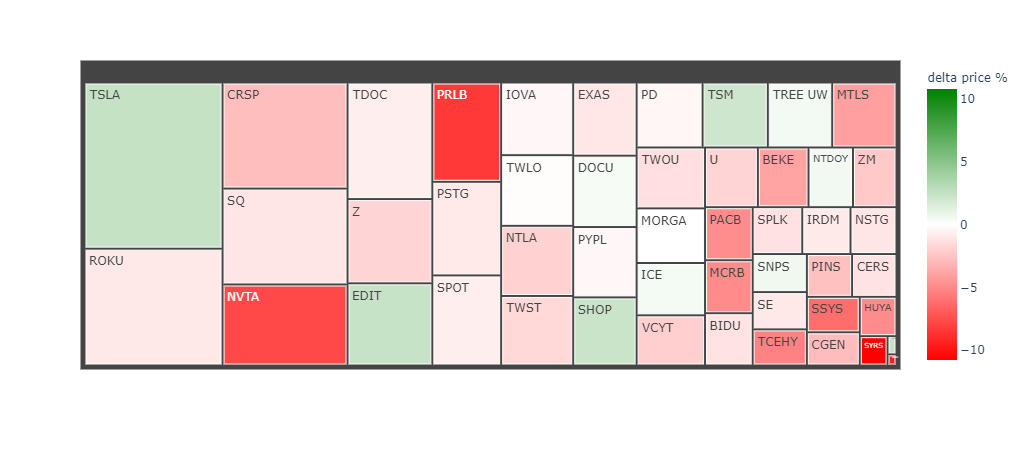

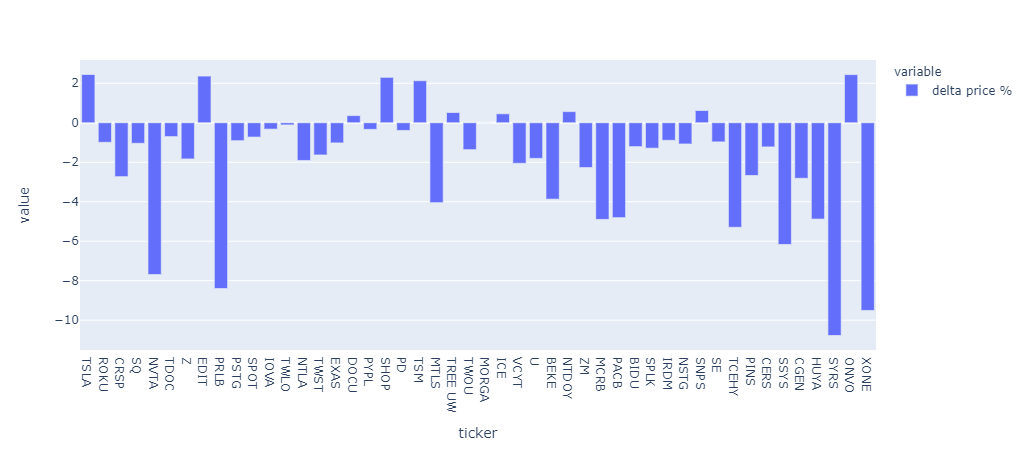

In [39]:
import plotly.express as px
fig1=px.treemap(data_out.loc[data_out['value new']>0], path=['ticker'], values='value new',
               color='delta price %',
               color_continuous_scale=['red','white','green'],
               color_continuous_midpoint=0)
fig1.show()

fig2=px.bar(data_out,x='ticker',y=['delta price %'])
fig2.show()

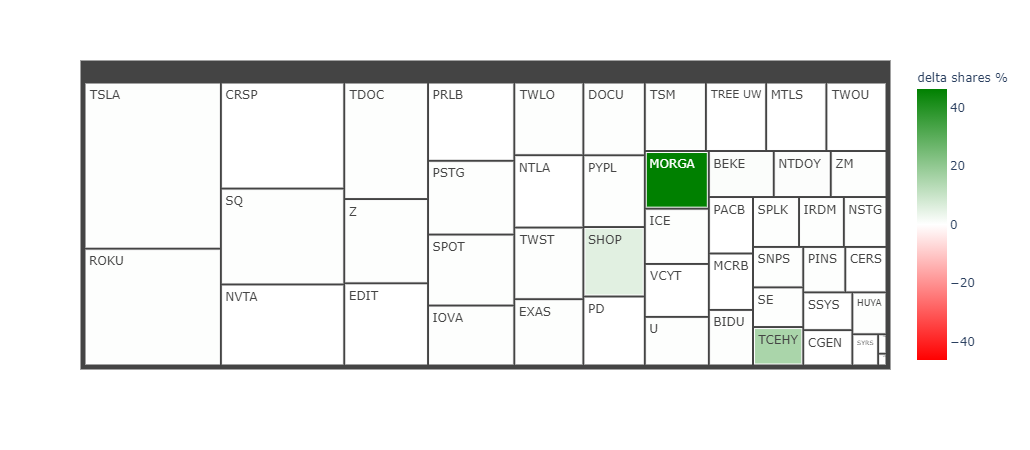

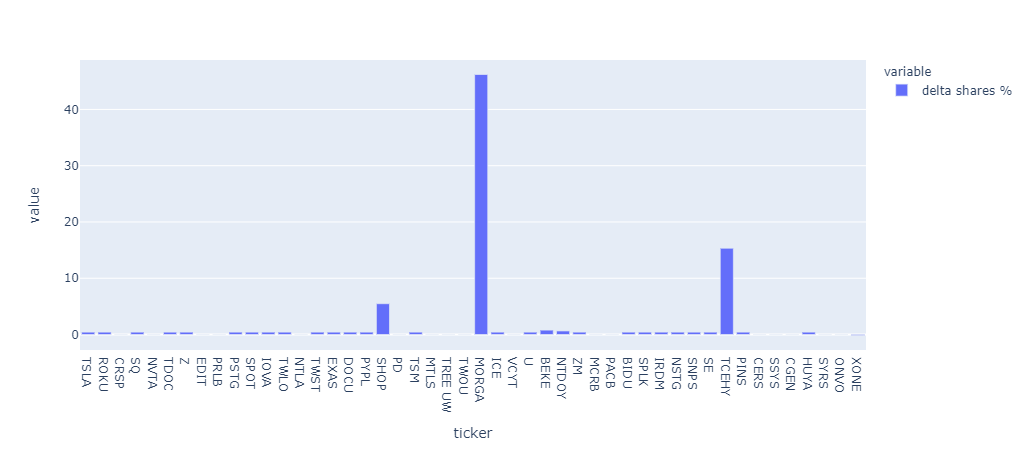

In [38]:
fig1=px.treemap(data_out.loc[data_out['value new']>0], path=['ticker'], values='value new',
               color='delta shares %',
               color_continuous_scale=['red','white','green'],
               color_continuous_midpoint=0)
fig1.show()

fig2=px.bar(data_out,x='ticker',y=['delta shares %'])
fig2.show()

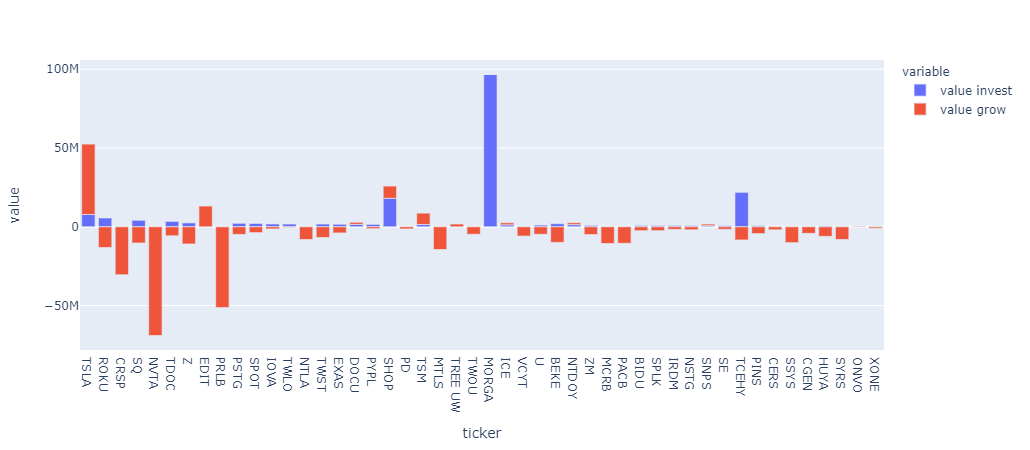

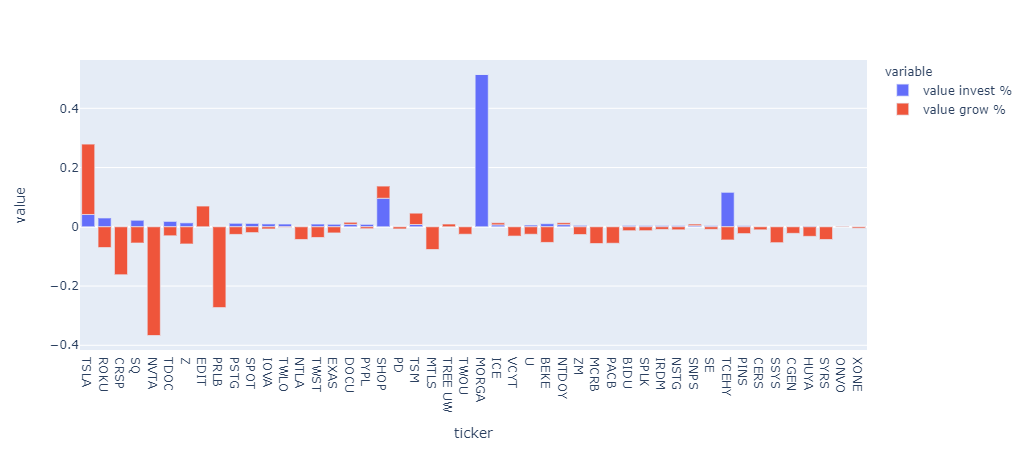

In [40]:
fig1=px.bar(data_out,x='ticker',y=['value invest','value grow'])
fig1.show()

fig2=px.bar(data_out,x='ticker',y=['value invest %','value grow %'])
fig2.show()
